In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import re
import pdb

# Logo-generating module
import anylogo

%matplotlib inline
plt.ion()

In [4]:
# Load energy model and tidy up
energy_df = pd.read_csv('crp_fullwt.26.txt',delim_whitespace=True)
energy_df.set_index('pos',inplace=True,drop=True)
energy_df.columns = [col.split('_')[-1] for col in energy_df.columns]
#energy_df.head()
energy_df

,A,C,G,T
pos,,,,
0,0.00,0.94,1.04,0.30
1,0.00,1.81,1.03,0.65
2,0.00,1.47,1.15,0.14
3,0.30,1.75,2.13,0.00
4,0.07,0.73,0.41,0.00
5,2.57,1.16,3.12,0.00
6,2.98,4.41,0.00,2.48
7,1.71,2.21,2.53,0.00
8,4.53,4.56,0.00,3.03


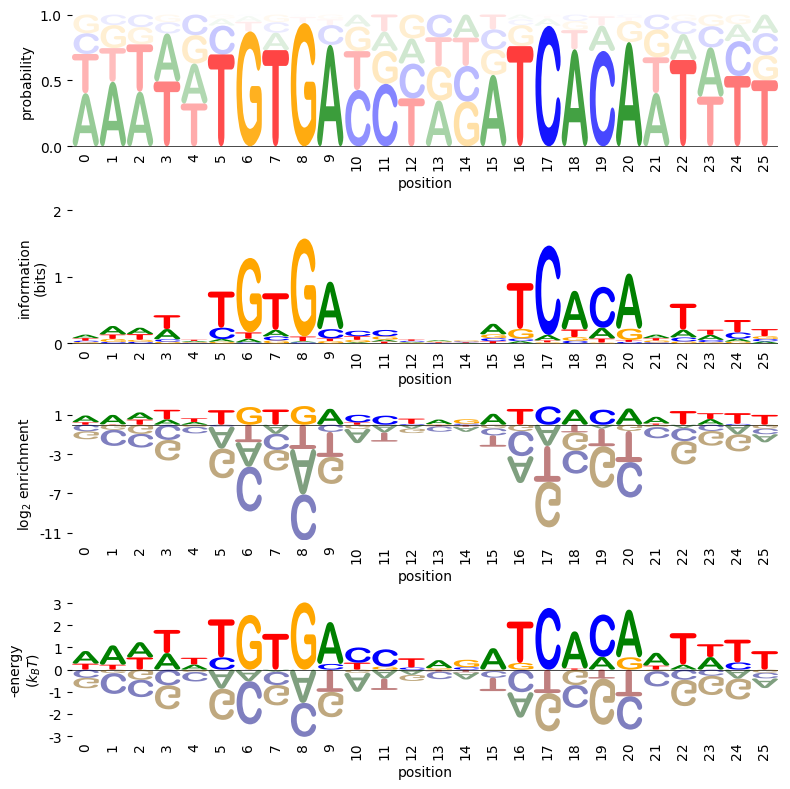

In [3]:
# Draw logos using energy matrix
logo_types = ['probability','information','enrichment','energy']
num_types = len(logo_types)

fig = plt.figure(figsize=[8,2*num_types])
for n, logo_type in enumerate(logo_types):
    
    ax = fig.add_subplot(num_types,1,n+1)
    anylogo.draw(ax,energy_df=energy_df,logo_type=logo_type)

plt.tight_layout()
plt.savefig('logos.pdf')